# Codice SageMath risoluzione trave
Il presente codice e la relativa relazione strutturale in formato LaTeX sono rilasciati sotto licenza MIT su [github](https://github.com/sononicola/Sicurezza_Strutturale) 

Materiale utile:
[Metodo delle forze in forma matriciale](https://www.matematicamente.it/staticfiles/approfondimenti/ingegneria/il-metodo-delle-forze-in-forma-matriciale.pdf), 
Libro 2 di Carpinteri

-- Nicola Meoli

In [1]:
#Creation of the folder "imgExportSage" where will me saved all images as *.pdf. If the command doens't work: just create it yourself
#It automatically check if the folder already exist and in case it will create a new one. If exist: the folder won't be replaced, so the files inside won't be deleted

from sage.misc.misc import sage_makedirs
sage_makedirs('imgExportSage')

In [2]:
#Dati problema
#Sinistra appoggio
#Destra incastro
#6 campate

l1=3.00
l2=4.50
l3=4.00
l4=5.00
l5=6.15
l6=4.00
ltot=l1+l2+l3+l4+l5+l6
nCampate=6
j=(0.3 * 0.5**3)/12 #m4
ej=31476*1000000*j/1000 #Mpa * m4 -> N*m2 -> kN*m2
ej

98362.5000000000

In [3]:
I=identity_matrix(nCampate)

In [4]:
#Generica 7x7
L1,L2,L3,L4,L5,L6,EJ=var('L1,L2,L3,L4,L5,L6,EJ')
flex_gen=matrix([
[1/3*L1,1/6*L1,0,0,0,0,0],
[1/6*L1,1/3*L1+1/3*L2,1/6*L2,0,0,0,0],
[0,1/6*L2,1/3*L2+1/3*L3,1/6*L3,0,0,0],
[0,0,1/6*L3,1/3*L3+1/3*L4,1/6*L4,0,0],
[0,0,0,1/6*L4,1/3*L4+1/3*L5,1/6*L5,0],
[0,0,0,0,1/6*L5,1/3*L5+1/3*L6,1/6*L6],
[0,0,0,0,0,+1/6*L6,1/3*L6]
])*1/(EJ)
#flex_gen[:,0]=0 #prima colonna
#flex_gen[0,:]=0 #prima riga
#flex_gen[:,6]=0 #ultima colonna
#flex_gen[6,:]=0 #ultima riga
show(flex_gen)

[       1/3*L1/EJ        1/6*L1/EJ                0                0                0                0                0]
[       1/6*L1/EJ 1/3*(L1 + L2)/EJ        1/6*L2/EJ                0                0                0                0]
[               0        1/6*L2/EJ 1/3*(L2 + L3)/EJ        1/6*L3/EJ                0                0                0]
[               0                0        1/6*L3/EJ 1/3*(L3 + L4)/EJ        1/6*L4/EJ                0                0]
[               0                0                0        1/6*L4/EJ 1/3*(L4 + L5)/EJ        1/6*L5/EJ                0]
[               0                0                0                0        1/6*L5/EJ 1/3*(L5 + L6)/EJ        1/6*L6/EJ]
[               0                0                0                0                0        1/6*L6/EJ        1/3*L6/EJ]

In [5]:
#A sinistra c'é appoggio quindi va tolta prima riga e colonna
flex=flex_gen.submatrix(1,1,6,6)
show(flex)

[1/3*(L1 + L2)/EJ        1/6*L2/EJ                0                0                0                0]
[       1/6*L2/EJ 1/3*(L2 + L3)/EJ        1/6*L3/EJ                0                0                0]
[               0        1/6*L3/EJ 1/3*(L3 + L4)/EJ        1/6*L4/EJ                0                0]
[               0                0        1/6*L4/EJ 1/3*(L4 + L5)/EJ        1/6*L5/EJ                0]
[               0                0                0        1/6*L5/EJ 1/3*(L5 + L6)/EJ        1/6*L6/EJ]
[               0                0                0                0        1/6*L6/EJ        1/3*L6/EJ]

In [6]:
F=flex.substitute(L1=l1,L2=l2,L3=l3,L4=l4,L5=l5,L6=l6,EJ=ej)
F

[0.0000254161901131021   7.62485703393061e-6                     0                     0                     0                     0]
[  7.62485703393061e-6 0.0000288050154615157   6.77765069682721e-6                     0                     0                     0]
[                    0   6.77765069682721e-6 0.0000304994281357225   8.47206337103402e-6                     0                     0]
[                    0                     0   8.47206337103402e-6 0.0000377854026348117 0.0000104206379463718                     0]
[                    0                     0                     0 0.0000104206379463718 0.0000343965772863981   6.77765069682721e-6]
[                    0                     0                     0                     0   6.77765069682721e-6 0.0000135553013936544]

In [7]:
P_gen_sx=matrix([L1^3/24,L2^3/24,L3^3/24,L4^3/24,L5^3/24,L6^3/24,0])
P_gen_dx=matrix([0,L1^3/24,L2^3/24,L3^3/24,L4^3/24,L5^3/24,L6^3/24])
show(P_gen_sx+P_gen_dx)
#TODO

[            1/24*L1^3 1/24*L1^3 + 1/24*L2^3 1/24*L2^3 + 1/24*L3^3 1/24*L3^3 + 1/24*L4^3 1/24*L4^3 + 1/24*L5^3 1/24*L5^3 + 1/24*L6^3             1/24*L6^3]

In [8]:
Q1,Q2,Q3,Q4,Q5,Q6=var('Q1,Q2,Q3,Q4,Q5,Q6')
P_gen=matrix([
        [Q1*L1^3],
        [Q1*L1^3+Q2*L2^3],
        [Q2*L2^3+Q3*L3^3],
        [Q3*L3^3+Q4*L4^3],
        [Q4*L4^3+Q5*L5^3],
        [Q5*L5^3+Q6*L6^3],
                [Q6*L6^3]
    ])*1/(24*EJ)
show(P_gen)

[            1/24*L1^3*Q1/EJ]
[1/24*(L1^3*Q1 + L2^3*Q2)/EJ]
[1/24*(L2^3*Q2 + L3^3*Q3)/EJ]
[1/24*(L3^3*Q3 + L4^3*Q4)/EJ]
[1/24*(L4^3*Q4 + L5^3*Q5)/EJ]
[1/24*(L5^3*Q5 + L6^3*Q6)/EJ]
[            1/24*L6^3*Q6/EJ]

In [9]:
P_gen[[1..6],[0]] #Matrice generica a cui è stata tolta la riga 0 non essendoci l'incastro

[1/24*(L1^3*Q1 + L2^3*Q2)/EJ]
[1/24*(L2^3*Q2 + L3^3*Q3)/EJ]
[1/24*(L3^3*Q3 + L4^3*Q4)/EJ]
[1/24*(L4^3*Q4 + L5^3*Q5)/EJ]
[1/24*(L5^3*Q5 + L6^3*Q6)/EJ]
[            1/24*L6^3*Q6/EJ]

In [10]:
lung=(matrix([0,l1,l1+l2,l1+l2+l3,l1+l2+l3+l4,l1+l2+l3+l4+l5,l1+l2+l3+l4+l5+l6]))
lung=lung.list()
lung

[0.000000000000000,
 3.00000000000000,
 7.50000000000000,
 11.5000000000000,
 16.5000000000000,
 22.6500000000000,
 26.6500000000000]

In [11]:
def momento(F,Pi,xi,Ri,nCampata):
    xxxi=xi
    rrri=Ri.list()
    i=nCampata
    Mi=-( 
            ((xxxi[0] + rrri[0] * (x-lung[0])) - (I[i-1,0]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[0]) - heaviside(x-lung[1])) +
            ((xxxi[1] + rrri[1] * (x-lung[1])) - (I[i-1,1]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[1]) - heaviside(x-lung[2])) +
            ((xxxi[2] + rrri[2] * (x-lung[2])) - (I[i-1,2]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[2]) - heaviside(x-lung[3])) +
            ((xxxi[3] + rrri[3] * (x-lung[3])) - (I[i-1,3]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[3]) - heaviside(x-lung[4])) +
            ((xxxi[4] + rrri[4] * (x-lung[4])) - (I[i-1,4]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[4]) - heaviside(x-lung[5])) +
            ((xxxi[5] + rrri[5] * (x-lung[5])) - (I[i-1,5]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[5]) - heaviside(x-lung[6]))
    )
    return Mi

In [12]:
#Stile dei grafici:

import matplotlib
matplotlib.pyplot.style.use('seaborn-poster')
# matplotlib.pyplot.style.available

# Momento unitario

In [13]:
def momento_pUnitario(Mi):
    Mi_plot=plot(Mi,0,ltot,
                 ticks=[[lung[0],lung[1],lung[2],lung[3],lung[4],lung[5],lung[6]],0.5],
                 gridlines='major',
                 axes_labels=['$L\,\,[m]$','$M^-\,\,[m^2]$'],
                 # frame=True, axes=False,
                 tick_formatter="latex",
                 fontsize=16,
                 aspect_ratio=2.5,
                 ymin=-2.5, ymax=3.2,
                 plot_points=500, dpi=500
                )
    return Mi_plot

#### CAMPATA 1

In [14]:
P1=P_gen[[1..6],[0]].substitute(Q1=1,Q2=0,Q3=0,Q4=0,Q5=0,Q6=0,L1=l1,L2=l2,EJ=ej) #Tolgo la prima riga e sostituisco il carico unitario Q1 e gli altri zero

x1=matrix(F\-P1) #Risolve il sistema
x1=matrix([0]).stack(x1) #Aggiungo 0 per tornare alla dimesione originale
x1=x1.list() #In lista così posso prendere io valori interni come numero singolo

R1=matrix([
        [((x1[1]-x1[0])/l1)+l1/2],
        [((x1[2]-x1[1])/l2)],
        [((x1[3]-x1[2])/l3)],
        [((x1[4]-x1[3])/l4)],
        [((x1[5]-x1[4])/l5)],
        [((x1[6]-x1[5])/l6)],
    ]); R1

[    1.33622036247514]
[   0.139807841738474]
[ -0.0426686733521432]
[ 0.00820063266743724]
[-0.00176509364771426]
[ 0.00102393028359927]

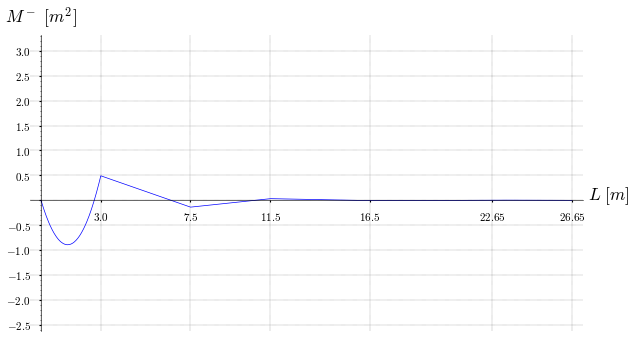

In [15]:
M1=momento(F,P1,x1,R1,1)

M1_pUnitario=momento_pUnitario(M1)
M1_pUnitario.save("imgExportSage/M1_pUnitario.pdf")
M1_pUnitario.show(dpi=50) #Giusto per vederlo in piccolo

#### CAMPATA 2

In [16]:
P2=P_gen[[1..6],[0]].substitute(Q1=0,Q2=1,Q3=0,Q4=0,Q5=0,Q6=0,L1=l1,L2=l2,EJ=ej)

X2=matrix(F\-P2)
x2=matrix([0]).stack(X2)
x2=x2.list()

R2=matrix([
        [((x2[1]-x2[0])/l1)],
        [((x2[2]-x2[1])/l2)+l2/2],
        [((x2[3]-x2[2])/l3)],
        [((x2[4]-x2[3])/l4)],
        [((x2[5]-x2[4])/l5)],
        [((x2[6]-x2[5])/l6)],
    ]); R2

[  -0.397735354491756]
[    2.27401324630952]
[   0.336015802648127]
[ -0.0645799822560683]
[  0.0139001124757498]
[-0.00806345098334429]

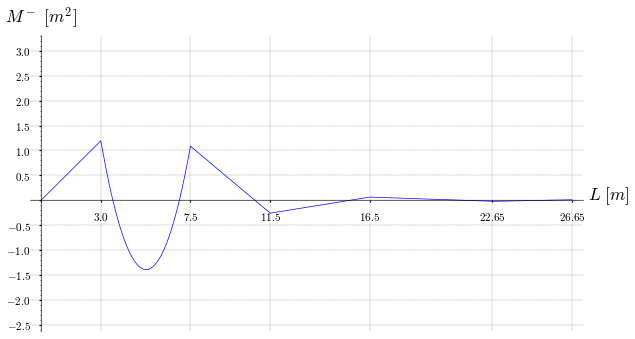

In [17]:
M2=momento(F,P2,x2,R2,2)

M2_pUnitario=momento_pUnitario(M2)
M2_pUnitario.save("imgExportSage/M2_pUnitario.pdf")
M2_pUnitario.show(dpi=50)

### CAMPATA 3

In [18]:
P3=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=1,Q4=0,Q5=0,Q6=0,L1=l1,L2=l2,L3=l3,EJ=ej)

X3=matrix(F\-P3)
x3=matrix([0]).stack(X3) 
x3=x3.list()
R3=matrix([
        [((x3[1]-x3[0])/l1)],
        [((x3[2]-x3[1])/l2)],
        [((x3[3]-x3[2])/l3)+l3/2],
        [((x3[4]-x3[3])/l4)],
        [((x3[5]-x3[4])/l5)],
        [((x3[6]-x3[5])/l6)],
    ]); R3

[ 0.0828982179465136]
[ -0.239483740734372]
[   2.01809373915562]
[  0.188715793729667]
[-0.0406189451770295]
[ 0.0235630376373957]

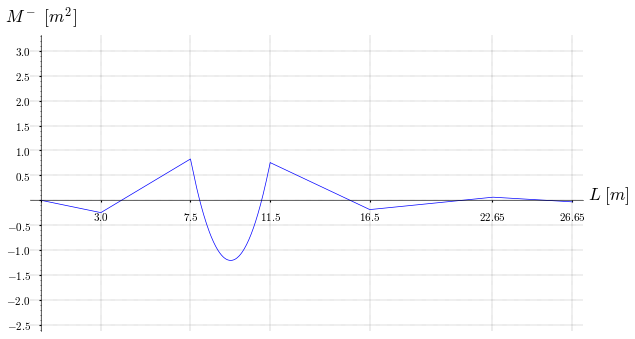

In [19]:
M3=momento(F,P3,x3,R3,3)

M3_pUnitario=momento_pUnitario(M3)
M3_pUnitario.save("imgExportSage/M3_pUnitario.pdf")
M3_pUnitario.show(dpi=50)

### CAMPATA 4

In [20]:
P4=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=0,Q4=1,Q5=0,Q6=0,L1=l1,L2=l2,L3=l3,L4=l4,EJ=ej)

X4=matrix(F\-P4)
x4=matrix([0]).stack(X4) 
x4=x4.list()

R4=matrix([
        [((x4[1]-x4[0])/l1)],
        [((x4[2]-x4[1])/l2)],
        [((x4[3]-x4[2])/l3)],
        [((x4[4]-x4[3])/l4)+l4/2],
        [((x4[5]-x4[4])/l5)],
        [((x4[6]-x4[5])/l6)],
    ]); R4

[-0.0381998039858491]
[  0.110354989292453]
[ -0.469141342701209]
[   2.56388225809328]
[  0.255298460080277]
[ -0.148098558380157]

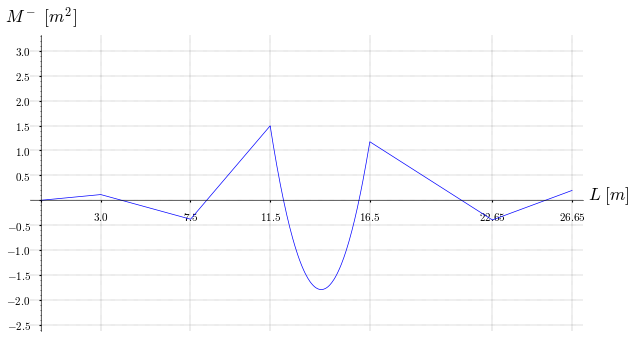

In [21]:
M4=momento(F,P4,x4,R4,4)

M4_pUnitario=momento_pUnitario(M4)
M4_pUnitario.save("imgExportSage/M4_pUnitario.pdf")
M4_pUnitario.show(dpi=50)

### CAMPATA 5

In [22]:
P5=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=0,Q4=0,Q5=1,Q6=0,L1=l1,L2=l2,L3=l3,L4=l4,L5=l5,EJ=ej)

x5=matrix(F\-P5)
x5=matrix([0]).stack(x5) 
x5=x5.list()

R5=matrix([
        [((x5[1]-x5[0])/l1)],
        [((x5[2]-x5[1])/l2)],
        [((x5[3]-x5[2])/l3)],
        [((x5[4]-x5[3])/l4)],
        [((x5[5]-x5[4])/l5)+l5/2],
        [((x5[6]-x5[5])/l6)],
    ]); R5

[ 0.0154910412605734]
[-0.0447518969749899]
[  0.190249350481417]
[ -0.532814364157423]
[   3.00538904775310]
[  0.932284570419608]

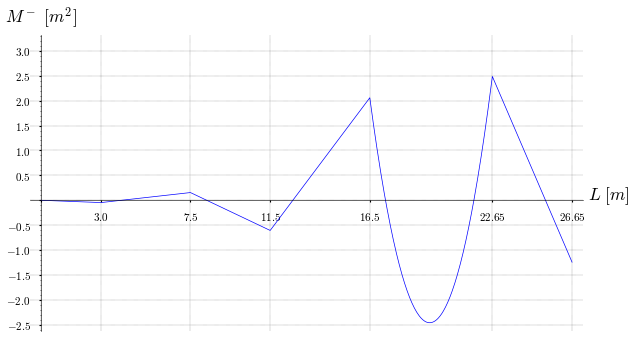

In [23]:
M5=momento(F,P5,x5,R5,5)

M5_pUnitario=momento_pUnitario(M5)
M5_pUnitario.save("imgExportSage/M5_pUnitario.pdf")
M5_pUnitario.show(dpi=50)

### CAMPATA 6

In [24]:
P6=P_gen[[1..6],[0]].substitute(Q1=0,Q2=0,Q3=0,Q4=0,Q5=0,Q6=1,L1=l1,L2=l2,L3=l3,L4=l4,L5=l5,L6=l6,EJ=ej)

x6=matrix(F\-P6)
x6=matrix([0]).stack(x6) 
x6=x6.list()

R6=matrix([
        [((x6[1]-x6[0])/l1)],
        [((x6[2]-x6[1])/l2)],
        [((x6[3]-x6[2])/l3)],
        [((x6[4]-x6[3])/l4)],
        [((x6[5]-x6[4])/l5)],
        [((x6[6]-x6[5])/l6)+l6/2],
    ]); R6

[-0.00107870844691940]
[ 0.00311626884665605]
[ -0.0132478881137289]
[  0.0371021770317928]
[  -0.102215486248930]
[    1.68199455872163]

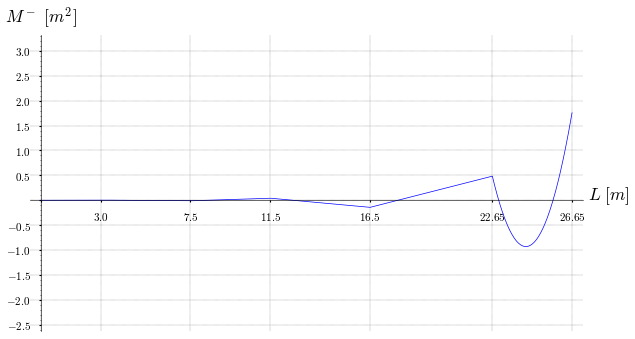

In [25]:
M6=momento(F,P6,x6,R6,6)

M6_pUnitario=momento_pUnitario(M6)
M6_pUnitario.save("imgExportSage/M6_pUnitario.pdf")
M6_pUnitario.show(dpi=50)

    ### CAMPATE UNITE

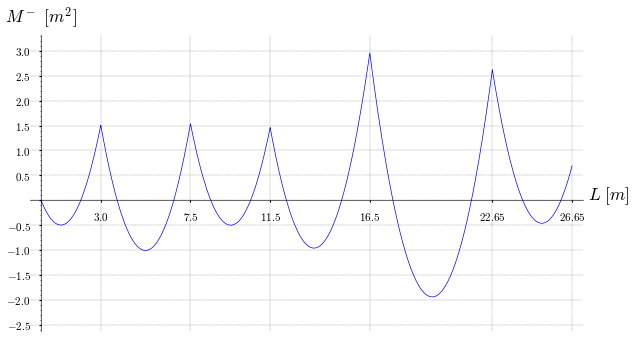

In [26]:
Mtot_pUnitario=momento_pUnitario(M1+M2+M3+M4+M5+M6)
Mtot_pUnitario.save("imgExportSage/Mtot_pUnitario.pdf")
Mtot_pUnitario.show(dpi=50)

# Taglio unitario

In [27]:
def taglio(Ri,nCampata):
#I è la matrice di identità definità all'inizio. serve per togliere il carico unitario di volta in volta:   T =  R - 1 * x
    rrri=Ri.list()
    i=nCampata
    Ti=( 
        (rrri[0] - (I[i-1,0]*(x-lung[i-1]))) * (heaviside(x-lung[0]) - heaviside(x-lung[1])) +
        (rrri[1] - (I[i-1,1]*(x-lung[i-1]))) * (heaviside(x-lung[1]) - heaviside(x-lung[2])) +
        (rrri[2] - (I[i-1,2]*(x-lung[i-1]))) * (heaviside(x-lung[2]) - heaviside(x-lung[3])) +
        (rrri[3] - (I[i-1,3]*(x-lung[i-1]))) * (heaviside(x-lung[3]) - heaviside(x-lung[4])) +
        (rrri[4] - (I[i-1,4]*(x-lung[i-1]))) * (heaviside(x-lung[4]) - heaviside(x-lung[5])) +
        (rrri[5] - (I[i-1,5]*(x-lung[i-1]))) * (heaviside(x-lung[5]) - heaviside(x-lung[6])) 
        )
    return Ti

In [28]:
def taglio_pUnitario(Ti):
    Ti_plot=plot(Ti,0,ltot,
                 ticks=[[lung[0],lung[1],lung[2],lung[3],lung[4],lung[5],lung[6]],0.5],
                 gridlines='major',
                 axes_labels=['$L\,\,[m]$','$T\,\,[m]$'],
                 tick_formatter="latex",
                 fontsize=16,
                 aspect_ratio=2.5,
                 ymin=-3.2, ymax=3.2,
                 plot_points=500, dpi=500
                )
    return Ti_plot

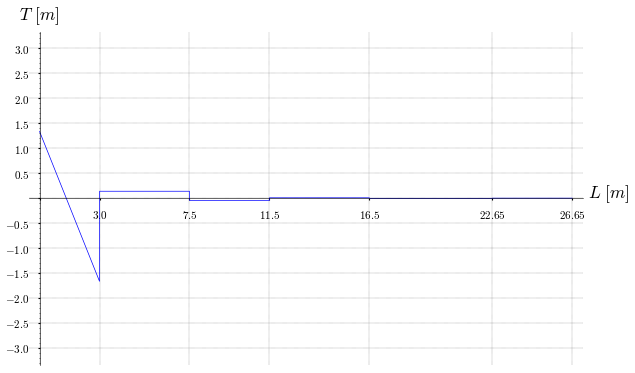

In [29]:
T1 = taglio(R1,1)

T1_pUnitario=taglio_pUnitario(T1)
T1_pUnitario.save("imgExportSage/T1_pUnitario.pdf")
T1_pUnitario.show(dpi=50)

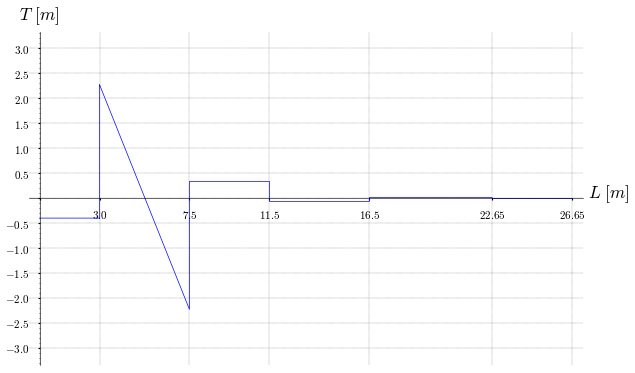

In [30]:
T2 = taglio(R2,2)

T2_pUnitario=taglio_pUnitario(T2)
T2_pUnitario.save("imgExportSage/T2_pUnitario.pdf")
T2_pUnitario.show(dpi=50)

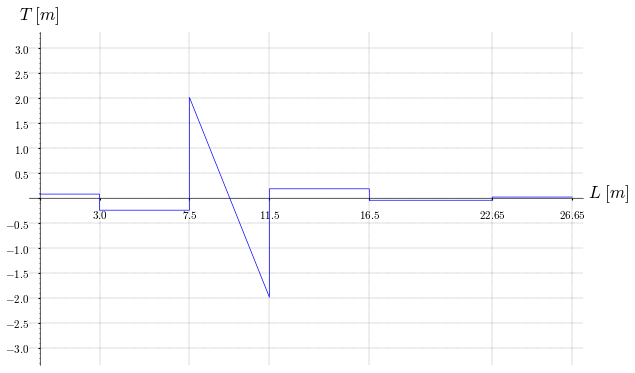

In [31]:
T3 = taglio(R3,3)

T3_pUnitario=taglio_pUnitario(T3)
T3_pUnitario.save("imgExportSage/T3_pUnitario.pdf")
T3_pUnitario.show(dpi=50)

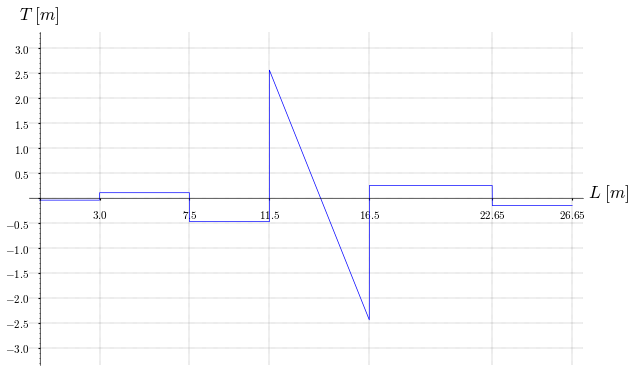

In [32]:
T4 = taglio(R4,4)

T4_pUnitario=taglio_pUnitario(T4)
T4_pUnitario.save("imgExportSage/T4_pUnitario.pdf")
T4_pUnitario.show(dpi=50)

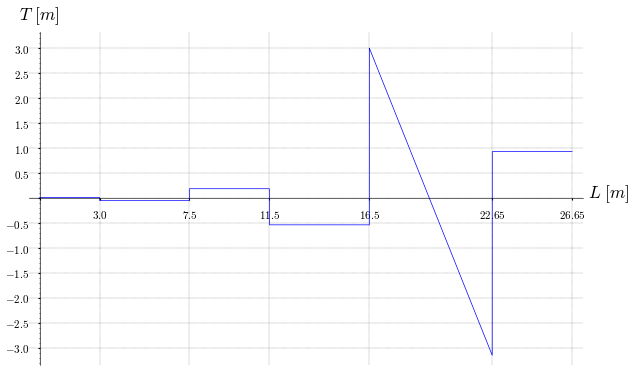

In [33]:
T5 = taglio(R5,5)

T5_pUnitario=taglio_pUnitario(T5)
T5_pUnitario.save("imgExportSage/T5_pUnitario.pdf")
T5_pUnitario.show(dpi=50)

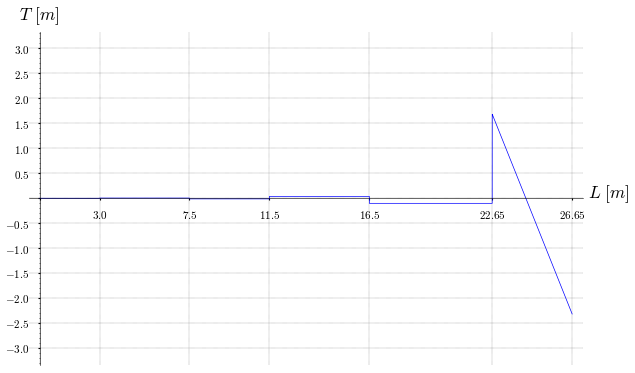

In [34]:
T6 = taglio(R6,6)

T6_pUnitario=taglio_pUnitario(T6)
T6_pUnitario.save("imgExportSage/T6_pUnitario.pdf")
T6_pUnitario.show(dpi=50)

### Campate unite

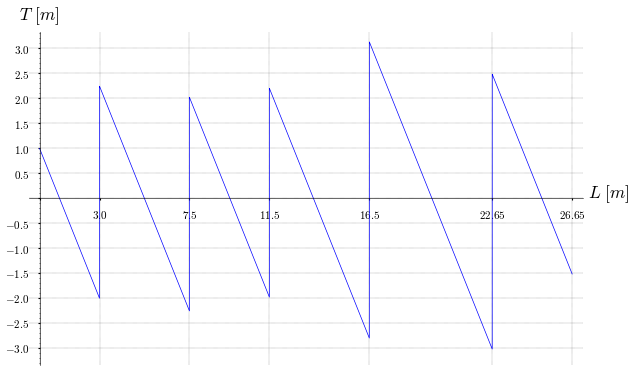

In [35]:
Ttot_pUnitario=taglio_pUnitario(T1+T2+T3+T4+T5+T6)
Ttot_pUnitario.save("imgExportSage/Ttot_pUnitario.pdf")
Ttot_pUnitario.show(dpi=50)

# Combinazioni per massimizzare gli effetti ad appoggi e campate
123456 numero campate

In campata 4 vanno i carichi B perché la lunghezza è diversa

SFSFSF campate dispari

FSFSFS campate pari

SSFSFS appoggi tra le due SS

FSSFSF

SFSSFS

FSFSSF

SFSFSS

In [36]:
#Write the name (like LOAD, SLE_freq, ext). This wil be used to save images and store the object in *obj so you can re-load them in the future
#The purpose is to re-write this cell with different values and different "type_load_name" for each case of load. Then re-load (at the end of this file) the *obj needed

type_load_name="ULS"
#type_load_name="SLScharacteristic"
#type_load_name="SLSfrequent"
#type_load_name="SLSquasiPermanent"

#Le campate sono diverse tra loro:
#Campate 1,2,3
LOAD_S_A=114.972
LOAD_F_A=46.342

#Campata 4 con M4
LOAD_S_B=90.22675
LOAD_F_B=38.584

#Campate 5,6
LOAD_S_C=71.935
LOAD_F_C=32.67

## Momento con i carichi

In [37]:
LOAD_m1 = LOAD_S_A*M1 + LOAD_F_A*M2 + LOAD_S_A*M3 + LOAD_F_B*M4 + LOAD_S_C*M5 + LOAD_F_C*M6
LOAD_m2 = LOAD_F_A*M1 + LOAD_S_A*M2 + LOAD_F_A*M3 + LOAD_S_B*M4 + LOAD_F_C*M5 + LOAD_S_C*M6
LOAD_m3 = LOAD_S_A*M1 + LOAD_S_A*M2 + LOAD_F_A*M3 + LOAD_S_B*M4 + LOAD_F_C*M5 + LOAD_S_C*M6
LOAD_m4 = LOAD_F_A*M1 + LOAD_S_A*M2 + LOAD_S_A*M3 + LOAD_F_B*M4 + LOAD_S_C*M5 + LOAD_F_C*M6
LOAD_m5 = LOAD_S_A*M1 + LOAD_F_A*M2 + LOAD_S_A*M3 + LOAD_S_B*M4 + LOAD_F_C*M5 + LOAD_S_C*M6
LOAD_m6 = LOAD_F_A*M1 + LOAD_S_A*M2 + LOAD_F_A*M3 + LOAD_S_B*M4 + LOAD_S_C*M5 + LOAD_F_C*M6
LOAD_m7 = LOAD_S_A*M1 + LOAD_F_A*M2 + LOAD_S_A*M3 + LOAD_F_B*M4 + LOAD_S_C*M5 + LOAD_S_C*M6

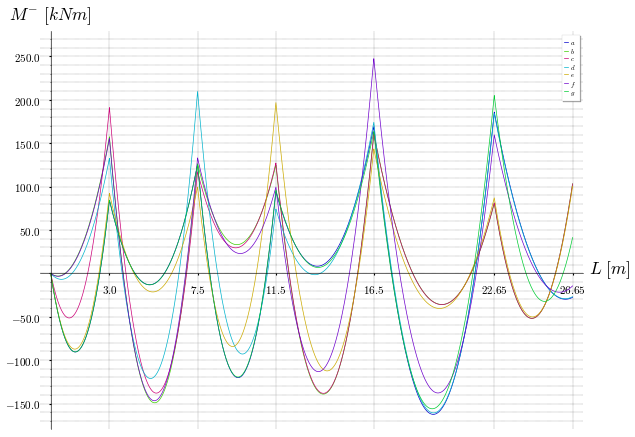

In [38]:
LOAD_ptot=plot([LOAD_m1,LOAD_m2,LOAD_m3,LOAD_m4,LOAD_m5,LOAD_m6,LOAD_m7],0,ltot,
              legend_label=['$a$','$b$','$c$','$d$','$e$','$f$','$g$'],
              ymin=-170,ymax=270,
              ticks=[[lung[0],lung[1],lung[2],lung[3],lung[4],lung[5],lung[6]],50], gridlines='minor', #punti su asse x e y
              axes_labels=['$L\,\,[m]$','$M^{-}\,\,[kNm]$'], 
              tick_formatter="latex",
              fontsize=16,
              plot_points=500, dpi=500
              # legend_options={'back_color': (0.9,0.9,0.9), 'shadow': False,'fontsize' : 50} #fontsize non va 
             );
LOAD_ptot.save("imgExportSage/"+type_load_name+"_ptot.pdf")
LOAD_ptot.save("imgExportSage/"+type_load_name+"_ptot") #plot object to re-call if needed
LOAD_ptot.show(dpi=50)

In [39]:
LOAD_max=max_symbolic(LOAD_m1,LOAD_m2,LOAD_m3,LOAD_m4,LOAD_m5,LOAD_m6,LOAD_m7)
LOAD_min=min_symbolic(LOAD_m1,LOAD_m2,LOAD_m3,LOAD_m4,LOAD_m5,LOAD_m6,LOAD_m7)

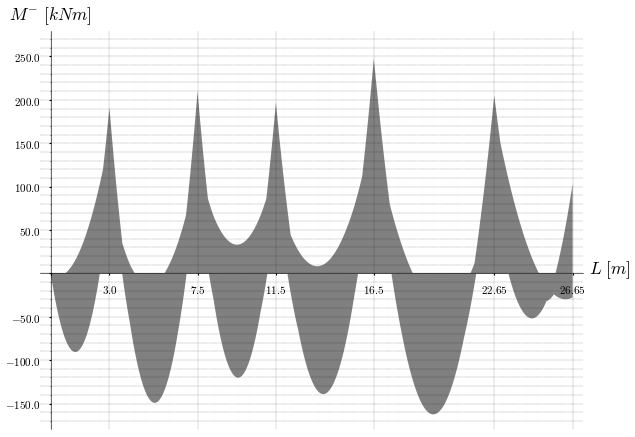

In [40]:
LOAD_pInviluppo=plot([LOAD_max,LOAD_min],0,ltot,fill=True,fillcolor='grey',fillalpha=1,alpha=0,
                                #?? fill=[0,max(LOAD_max,LOAD_min)]
                                #fillaplha=1 perché altrimenti si vedono i due grafici uno sopra l'altro e non so come unirli in uno unico
                                #alpha=0 è la linea del grafico. =0 per lo stesso motivo sopra
              ymin=-170,ymax=270,
              ticks=[[lung[0],lung[1],lung[2],lung[3],lung[4],lung[5],lung[6]],50], gridlines='minor', #punti su asse x e y
              axes_labels=['$L\,\,[m]$','$M^{-}\,\,[kNm]$'], 
              tick_formatter="latex",
              fontsize=16,
              plot_points=500, dpi=500
             );
LOAD_pInviluppo.save("imgExportSage/"+type_load_name+"_pInviluppo.pdf")
LOAD_pInviluppo.save("imgExportSage/"+type_load_name+"_pInviluppo")
LOAD_pInviluppo.show(dpi=50)

In [41]:
# M+ è sotto, M- sopra

d=0.05
LOAD_table = table(
        rows=[
            [0,0],
            [0,                                                         abs(find_local_minimum(LOAD_min,lung[0],lung[1])[0])     ],
            [find_local_maximum(LOAD_max,lung[1]-d,lung[1]+d)[0],      0                                                         ], #nodo 2
            ["-",                                                         abs(find_local_minimum(LOAD_min,lung[1],lung[2])[0])   ],
            [find_local_maximum(LOAD_max,lung[2]-d,lung[2]+d)[0],      0                                                         ],
            ["-",                                                         abs(find_local_minimum(LOAD_min,lung[2],lung[3])[0])   ],
            [find_local_maximum(LOAD_max,lung[3]-d,lung[3]+d)[0],      0                                                         ],
            ["-",                                                         abs(find_local_minimum(LOAD_min,lung[3],lung[4])[0])   ],
            [find_local_maximum(LOAD_max,lung[4]-d,lung[4]+d)[0],      0                                                         ],
            ["-",                                                         abs(find_local_minimum(LOAD_min,lung[4],lung[5])[0])   ],
            [find_local_maximum(LOAD_max,lung[5]-d,lung[5]+d)[0],      0                                                         ],
            ["-",                                                         abs(find_local_minimum(LOAD_min,lung[5],lung[6])[0])   ],
            [find_local_maximum(LOAD_max,lung[6]-d,lung[6]+d)[0],      abs(find_local_minimum(LOAD_min,lung[6]-d,lung[6]+d)[0])   ], #7 incastro
        ],
        header_row=["$M^{-}$", "$M^{+}$"],
        header_column=["","Nodo 1","Campata 1","Nodo 2","Campata 2","Nodo 3","Campata 3","Nodo 4","Campata 4","Nodo 5","Campata ","Nodo 6","Campata 6","Nodo 7"],
        align='center'
)
LOAD_table

,,
Nodo 1,,
Campata 1,,
Nodo 2,,
Campata 2,-,
Nodo 3,,
Campata 3,-,
Nodo 4,,
Campata 4,-,
Nodo 5,,
Campata,-,


In [42]:
latex(LOAD_table)

\begin{tabular}{c|cc}
 & $M^{-}$ & $M^{+}$ \\ \hline
Nodo 1 & $0$ & $0$ \\
Campata 1 & $0$ & $90.59510074351833$ \\
Nodo 2 & $191.20494238732024$ & $0$ \\
Campata 2 & - & $149.17994885494937$ \\
Nodo 3 & $209.7374822779232$ & $0$ \\
Campata 3 & - & $120.20361452311458$ \\
Nodo 4 & $196.85505636337578$ & $0$ \\
Campata 4 & - & $139.16454127971588$ \\
Nodo 5 & $247.70491445638314$ & $0$ \\
Campata  & - & $162.53074109021222$ \\
Nodo 6 & $205.05217729239766$ & $0$ \\
Campata 6 & - & $51.88423006920797$ \\
Nodo 7 & $103.33745164088299$ & $28.213551575164182$ \\
\end{tabular}

## Taglio con i carichi

In [43]:
LOAD_t1 = LOAD_S_A*T1 + LOAD_F_A*T2 + LOAD_S_A*T3 + LOAD_F_B*T4 + LOAD_S_C*T5 + LOAD_F_C*T6
LOAD_t2 = LOAD_F_A*T1 + LOAD_S_A*T2 + LOAD_F_A*T3 + LOAD_S_B*T4 + LOAD_F_C*T5 + LOAD_S_C*T6
LOAD_t3 = LOAD_S_A*T1 + LOAD_S_A*T2 + LOAD_F_A*T3 + LOAD_S_B*T4 + LOAD_F_C*T5 + LOAD_S_C*T6
LOAD_t4 = LOAD_F_A*T1 + LOAD_S_A*T2 + LOAD_S_A*T3 + LOAD_F_B*T4 + LOAD_S_C*T5 + LOAD_F_C*T6
LOAD_t5 = LOAD_S_A*T1 + LOAD_F_A*T2 + LOAD_S_A*T3 + LOAD_S_B*T4 + LOAD_F_C*T5 + LOAD_S_C*T6
LOAD_t6 = LOAD_F_A*T1 + LOAD_S_A*T2 + LOAD_F_A*T3 + LOAD_S_B*T4 + LOAD_S_C*T5 + LOAD_F_C*T6
LOAD_t7 = LOAD_S_A*T1 + LOAD_F_A*T2 + LOAD_S_A*T3 + LOAD_F_B*T4 + LOAD_S_C*T5 + LOAD_S_C*T6

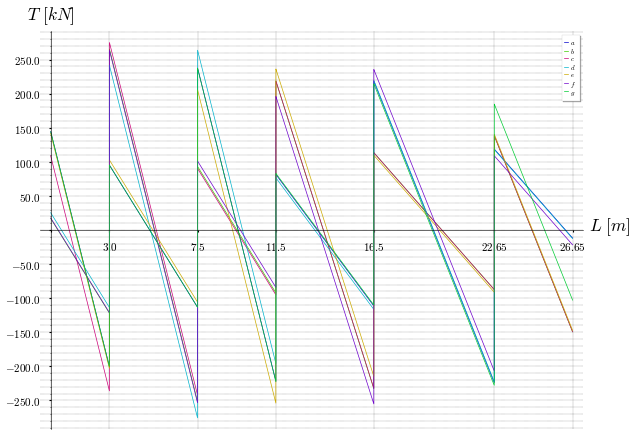

In [44]:
LOAD_Tptot=plot([LOAD_t1,LOAD_t2,LOAD_t3,LOAD_t4,LOAD_t5,LOAD_t6,LOAD_t7],0,ltot,
              legend_label=['$a$','$b$','$c$','$d$','$e$','$f$','$g$'],
              ymin=-280,ymax=280, 
              ticks=[[lung[0],lung[1],lung[2],lung[3],lung[4],lung[5],lung[6]],50], gridlines='minor', #punti su asse x e y
              axes_labels=['$L\,\,[m]$','$T\,\,[kN]$'], 
              tick_formatter="latex",
              fontsize=16,
              plot_points=500, dpi=500
             );
LOAD_Tptot.save("imgExportSage/"+type_load_name+"_Tptot.pdf")
LOAD_Tptot.save("imgExportSage/"+type_load_name+"_Tptot")
LOAD_Tptot.show(dpi=50)

In [45]:
LOAD_Tmax=max_symbolic(LOAD_t1,LOAD_t2,LOAD_t3,LOAD_t4,LOAD_t5,LOAD_t6,LOAD_t7)
LOAD_Tmin=min_symbolic(LOAD_t1,LOAD_t2,LOAD_t3,LOAD_t4,LOAD_t5,LOAD_t6,LOAD_t7)

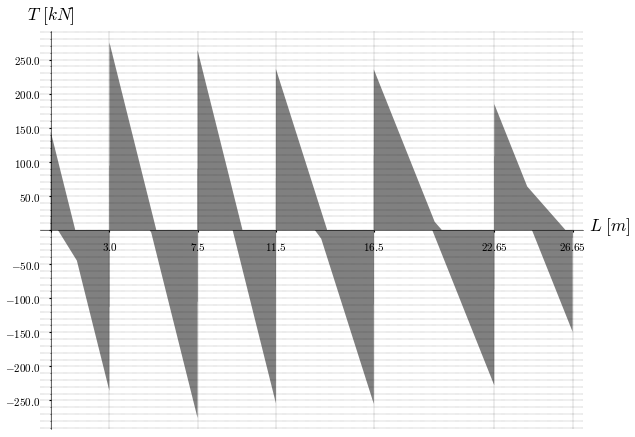

In [46]:
LOAD_TpInviluppo=plot([LOAD_Tmax,LOAD_Tmin],0,ltot,fill=True,fillcolor='grey',fillalpha=1,alpha=0,
                                #?? fill=[0,max(LOAD_max,LOAD_min)]
                                #fillaplha=1 perché altrimenti si vedono i due grafici uno sopra l'altro e non so come unirli in uno unico
                                #alpha=0 è la linea del grafico. =0 per lo stesso motivo sopra
              ymin=-280,ymax=280, 
              ticks=[[lung[0],lung[1],lung[2],lung[3],lung[4],lung[5],lung[6]],50], gridlines='minor', #punti su asse x e y
              axes_labels=['$L\,\,[m]$','$T\,\,[kN]$'], 
              tick_formatter="latex",
              fontsize=16,
              plot_points=500, dpi=500
             );
LOAD_TpInviluppo.save("imgExportSage/"+type_load_name+"_TpInviluppo.pdf")
LOAD_TpInviluppo.save("imgExportSage/"+type_load_name+"_TpInviluppo")
LOAD_TpInviluppo.show(dpi=50)

In [47]:
def T_table(functTmax,functTmin):
    d=0.0001
    temp_Ttable = table(
            rows=[
                [find_local_maximum(functTmax,lung[0]-d,lung[0]+d)[0],      abs(find_local_minimum(functTmin,lung[0]-d,lung[0]+d)[0])   ],
                [find_local_maximum(functTmax,lung[1]-d,lung[1]+d)[0],      abs(find_local_minimum(functTmin,lung[1]-d,lung[1]+d)[0])   ],
                [find_local_maximum(functTmax,lung[2]-d,lung[2]+d)[0],      abs(find_local_minimum(functTmin,lung[2]-d,lung[2]+d)[0])   ],
                [find_local_maximum(functTmax,lung[3]-d,lung[3]+d)[0],      abs(find_local_minimum(functTmin,lung[3]-d,lung[3]+d)[0])   ],
                [find_local_maximum(functTmax,lung[4]-d,lung[4]+d)[0],      abs(find_local_minimum(functTmin,lung[4]-d,lung[4]+d)[0])   ],
                [find_local_maximum(functTmax,lung[5]-d,lung[5]+d)[0],      abs(find_local_minimum(functTmin,lung[5]-d,lung[5]+d)[0])   ],
                [find_local_maximum(functTmax,lung[6]-d,lung[6]+d)[0],      abs(find_local_minimum(functTmin,lung[6]-d,lung[6]+d)[0])   ],
            ],
            header_row=["$T^{+}$", "$T^{-}$"],
            header_column=["","Nodo 1","Nodo 2","Nodo 3","Nodo 4","Nodo 5","Nodo 6","Nodo 7"],
            align='center'
    )
    return temp_Ttable

In [48]:
LOAD_Ttable=T_table(LOAD_Tmax,LOAD_Tmin);
LOAD_Ttable

,,
Nodo 1,,
Nodo 2,,
Nodo 3,,
Nodo 4,,
Nodo 5,,
Nodo 6,,
Nodo 7,,


In [49]:
latex(LOAD_Ttable)

\begin{tabular}{c|cc}
 & $T^{+}$ & $T^{-}$ \\ \hline
Nodo 1 & $144.3322545717767$ & $0.0$ \\
Nodo 2 & $275.1427769875718$ & $236.19297919465944$ \\
Nodo 3 & $263.8307511061692$ & $275.8405725529582$ \\
Nodo 4 & $236.23976658133304$ & $254.26441577289492$ \\
Nodo 5 & $235.5219897713423$ & $255.21824282518898$ \\
Nodo 6 & $184.79704846829966$ & $227.9388204285898$ \\
Nodo 7 & $1.4210854715202004 \times 10^{-14}$ & $149.43807558386285$ \\
\end{tabular}

## Grafici tutti uniti

In [50]:
#TODO

In [51]:
#Sono variabili 'grafico'

ULS=load("imgExportSage/ULS_pInviluppo")
#SLScharacteristic=load("imgExportSage/SLScharacteristic_pInviluppo")
#SLSfrequent=load("imgExportSage/SLSfrequent_pInviluppo")
#SLSquasiPermanent=load("imgExportSage/SLSquasiPermanent_pInviluppo")

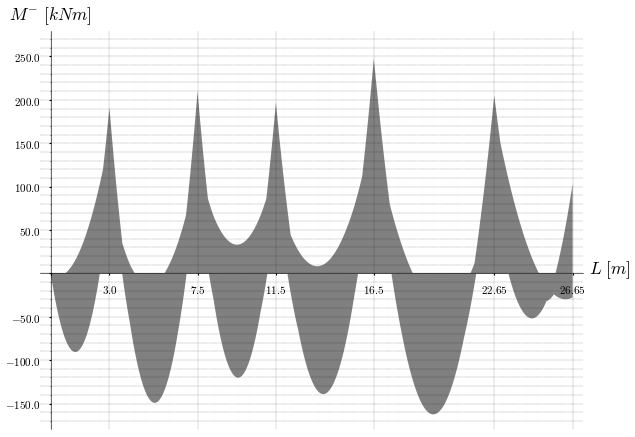

In [52]:
ULS.show(dpi=50)